# Getting Started

In this series of MOOCs we aim to introduce participants to methods for analyzing sports data using Python. In this first MOOC we introduce some basic concepts. These can be broken down into three areas:

1.  How to code sports data so that you can apply statistical methods
2. The use of statistical methods 
3. The interpretation of results

As we go along we will introduce you to the concepts by analyzing data from different sports and generating results. Once you get the hang of how this works, you'll Pythagorean be able to do it for yourself.

In this first week, we're going to go through simple but powerful examples that introduce you to all three elements.

# The Pythagorean Expectation

The Pythagorean expectation is an idea devised by the famous baseball analyst, Bill James, but it can in fact be applied to any sport.

In any sports league, teams win games by accumulating a higher total than  opponent. In baseball and cricket the relevant totals are runs, in basketball it is points, and in soccer and hockey it is goals (by "hockey" we mean here what the world outside of the US and Canada usually calls ice hockey, but in fact the same is true in field hockey).

The Pythagorean expectation can be described thus: in any season, the percentage of games won will be proportional to the square of total runs/points/goals scored by the team *squared* divided by the sum of total runs/points/goals scored by the team *squared* plus total runs/points/goals conceded by the team *squared*.

or *wpc = T<sub>F</sub><sup>2</sup> / ( T<sub>F</sub><sup>2</sup> + T<sub>A</sub><sup>2</sup> )*

Where T<sub>F</sub> is runs/points/goals scored and T<sub>A</sub> is runs/points/goals conceded.

This is a concept which can help to explain not only why teams are successful, but also can be used as the basis for predicting results in the future.

In this first week we are going to derive the Pythagorean expectation for five leagues in five different sports:

Major League Baseball
The English Premier League (soccer)
The Indian Premier League (cricket)
The National Basketball Association (NBA)
The National Hockey League (NHL)


## Coding the data

To derive the Pythagorean Expectation we will need to manipulate the data, which is a core skill that we expect you to obtain from these MOOCs. However, for this first week, we move quite quickly through the code, since our main objective is to show you the kinds of analysis you will be able to produce once you master Python.

## The Pythagorean Expectation for baseball

We begin, naturally enough, with baseball. Running code in Python typically involves the following steps:

1. Importing "packages" - these enable to run certain types of commands. The same ones come up over and over again - pandas, numpy, matplotlib.pyplot and so on.

2. Import the raw data - from a csv or excel file - in these MOOCs we will provide the data for you

3. Running commands to shape the data in preparation for running the statistical model

4. Running the statistical model

5. Reviewing the results

With each line of code below, there is a brief explanation of the code. When you are ready, read each line, then place the cursor on the relevant line and press "run" in the toolbar.

In [1]:
# Here are the packages we need

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This command imports our data, which is a log of games played in 2018 doenloaded from Retrosheet 
#(you can find the data here: https://www.retrosheet.org/)
# the second line of the command prints a list of variable names - there are many more than we need

MLB = pd.read_excel('Retrosheet MLB game log 2018.xlsx')
print(MLB.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [3]:
# We can see what our dataframe looks like simply by typing its name

MLB

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,20180930,0,Sun,CHA,AL,162,MIN,AL,162,4,...,Logan Forsythe,4,astuw001,Willians Astudillo,5,gratj001,Juan Graterol,2,NaN,Y
2427,20180930,0,Sun,TEX,AL,162,SEA,AL,162,1,...,Kristopher Negron,4,freid001,David Freitas,2,romia001,Andrew Romine,6,NaN,Y
2428,20180930,0,Sun,TOR,AL,162,TBA,AL,162,4,...,Austin Meadows,9,bauej001,Jake Bauers,3,ciufn001,Nick Ciuffo,2,NaN,Y
2429,20181001,0,Mon,MIL,NL,163,CHN,NL,163,3,...,Jason Heyward,8,quinj001,Jose Quintana,1,contw001,Willson Contreras,2,NaN,Y


In [4]:
# For the Pythagorean Expectation we need only runs scored and conceded. Of course, we also need the names of the teams.
# and the date will also be useful. We put these into a new dataframe (df) which we call MLB18.
# The variable names are rather lengthy, so to make life easier we can rename columns to give them short names.
# If we want to see what the data looks like, we can just type the name of the df.

MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329
...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930
2427,TEX,SEA,1,3,20180930
2428,TOR,TBA,4,9,20180930
2429,MIL,CHN,3,1,20181001


In [5]:
# We will need to know who won the game - which we can tell by who scored the more runs, the home team or the visiting teams
#(there are no ties in baseball)
# The variable 'hwin' is defined here as equaling 1 if the home team scored more runs, and zero otherwise. 
# The variable 'awin' is defined in a similar way for the away team.
# we also create a 'counter' variable = 1 for each row.

MLB18['hwin']= np.where(MLB18['HomR']>MLB18['VisR'],1,0)
MLB18['awin']= np.where(MLB18['HomR']<MLB18['VisR'],1,0)
MLB18['count']=1
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1
1,PHI,ATL,5,8,20180329,1,0,1
2,SFN,LAN,1,0,20180329,0,1,1
3,CHN,MIA,8,4,20180329,0,1,1
4,SLN,NYN,4,9,20180329,1,0,1
...,...,...,...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930,1,0,1
2427,TEX,SEA,1,3,20180930,1,0,1
2428,TOR,TBA,4,9,20180930,1,0,1
2429,MIL,CHN,3,1,20181001,0,1,1


In [6]:
# Since our data refers to games, for each game there are two teams, but what we want is a list of runs scored and conceded
# by each team and its win percentage. 
# To create this we are going to define two dfs, one for home teams and one for away teams, which we can then merge to get 
# the stats for the entire season.
# Here we define a df for home teams. The command is called ".groupby" and we will use this often. We group by home team
# to obtain the sum of wins and runs (scored and conceded) and also the counter variable to show how many games were played 
# (in MLB the teams do not necessarily play the same number of games in the regular season)
# Finally we rename the columns.
 
MLBhome = MLB18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()
MLBhome = MLBhome.rename(columns={'HomeTeam':'team','VisR':'VisRh','HomR':'HomRh','count':'Gh'})
MLBhome

<ipython-input-6-aec6a41e8318>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBhome = MLB18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()


,team,hwin,HomRh,VisRh,Gh
0,ANA,42,355,355,81
1,ARI,40,359,328,81
2,ATL,43,391,357,81
3,BAL,28,339,411,81
4,BOS,57,468,322,81
5,CHA,30,321,409,81
6,CHN,51,385,349,82
7,CIN,37,385,418,81
8,CLE,49,443,334,81
9,COL,47,445,404,81


In [7]:
#Your Code Here

# Self test - 1

Sometimes the code you write doesn't produce the result you want, and you need to go back and re-do it. Frequently it makes sense to go back to the beginning, rather than try to amend a df which isn't working the way you want it to. Re-starting is easy- just click on "Kernel" in the toolbar and then click "Restart and Clear Output". You can now begin again.

Copy the previous cell (first use "Insert" to add a extra cell, and then use copy and paste), and then delete ".reset_index()" and then run the code to see what happens differently. The extra headings would be a problem later on, which makes ".reset_index()" very useful in many situations.

In [8]:
# Now we create a similar df for teams playing as visitors - To write this code all you need to do is to copy and paste
# the previous cell and then change any reference to the home team into a reference to the visiting team.

MLBaway = MLB18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()
MLBaway = MLBaway.rename(columns={'VisitingTeam':'team','VisR':'VisRa','HomR':'HomRa','count':'Ga'})
MLBaway

<ipython-input-8-8147fa16e038>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBaway = MLB18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()


,team,awin,HomRa,VisRa,Ga
0,ANA,38,367,366,81
1,ARI,42,316,334,81
2,ATL,47,300,368,81
3,BAL,19,481,283,81
4,BOS,51,325,408,81
5,CHA,32,439,335,81
6,CHN,44,296,376,81
7,CIN,30,401,311,81
8,CLE,42,314,375,81
9,COL,44,341,335,82


In [9]:
# We now merge MLBhome and MLBaway so that we have a list of all the clubs with home and away records for the 2018 season
# We will be using pd.merge frequently during the course to combine dfs
# Note that we've called this new df "MLB18", which is name we had already used for earlier df. By doing this we are simply
# overwriting the old MLB18 - which is fine in this case since we don't need the data in the old MLB18 any more.
# If we did want to retain the daat in the old MLB18 df, we should have given this new df a different name. 

MLB18 = pd.merge(MLBhome,MLBaway,on='team')
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga
0,ANA,42,355,355,81,38,367,366,81
1,ARI,40,359,328,81,42,316,334,81
2,ATL,43,391,357,81,47,300,368,81
3,BAL,28,339,411,81,19,481,283,81
4,BOS,57,468,322,81,51,325,408,81
5,CHA,30,321,409,81,32,439,335,81
6,CHN,51,385,349,82,44,296,376,81
7,CIN,37,385,418,81,30,401,311,81
8,CLE,49,443,334,81,42,314,375,81
9,COL,47,445,404,81,44,341,335,82


# Self test - 2

When creating MLBhome and MLBaway we we renamed the variables using ".rename(columns ={'oldname':'newname'})". Copy and paste these cells and then re-run the code and see how the merge looks. Note that when Python encounters two variables with the same name in a merge it relabels the names with _x and _y. 

Sometimes we can work with the data in this way, but usually renaming makes it easier to follow.

In [10]:
# Now we create the total wins, games, played, runs scored and run conceded by summing the totals as home team and away team

MLB18['W']=MLB18['hwin']+MLB18['awin']
MLB18['G']=MLB18['Gh']+MLB18['Ga']
MLB18['R']=MLB18['HomRh']+MLB18['VisRa']
MLB18['RA']=MLB18['VisRh']+MLB18['HomRa']
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648
9,COL,47,445,404,81,44,341,335,82,91,163,780,745


In [11]:
# The last step in preparing the data is to define win percentage and the Pythagorean Expectation.

MLB18['wpc'] = MLB18['W']/MLB18['G']
MLB18['pyth'] = MLB18['R']**2/(MLB18['R']**2 + MLB18['RA']**2)
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA,wpc,pyth
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722,0.493827,0.499307
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644,0.506173,0.536600
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657,0.555556,0.571662
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892,0.290123,0.327161
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647,0.666667,0.647037
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848,0.382716,0.374388
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645,0.582822,0.581946
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819,0.413580,0.419344
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648,0.561728,0.614423
9,COL,47,445,404,81,44,341,335,82,91,163,780,745,0.558282,0.522939


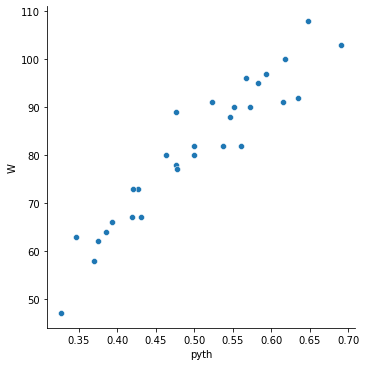

In [12]:
# Having prepared the data, we are now ready to examine it. First, we generate and xy plot use the Seaborn package.
# This illustrates nicely the close correlation between win percentage and the Pythagorean Expectation.

sns.relplot(x="pyth", y="W", data = MLB18)

## Self test - 3

run sns.relplot again, but this time write y="W" instead of y="wpc". What do you find? Does it make a difference?

# Finally we generate a regression.

The regression output tells you many things about the fitted relationship between win percentage and the Pythagorean Expectation. Regression is a method for identifying an equation which best fits the data. In this case that relationship is 

wpc = Intercept + coef x pyth

You can see the value of Intercept is 0.0609 and coef is .8770. It's this latter value were interested in. It means that for every one unit increase in pyth, the value of wpc goes up by 0.887.

Two other points to note: 

(i) The standard error (std err) gives us an idea of the precision of the estimate. The ratio of the coefficient (coef) to the standard error is called the t statistic (t) and its value informs us about statistical significance. This is illustrated by the p-value (P > |t|) - this is the probability that we would observe the value .8770 by chance, if the true value were really zero. This probability here is 0.000 - (this is not exactly zero, but the table doesn't include enough decimal places to show this) which means we can confident it is not zero. By convention, it is usual to conclude that we cannot be confident that the value of the coefficient is not zero if the p-value is greater than .05

(ii) in the top right hand corner of the table is the R-squared. This statistic tells you the percentage of variation in the y-variable (wpc) which can be accounted for by the variation in the x variables (pyth). R-squared can be thought of as a percentage - here the Pythagorean Expectation can account for 89.4% of the variation in win percentage.


In [13]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.54e-15
Time:                        07:47:33   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Self test - 4

Run the regression above but instead write 'wpc ~ W' instead of 'wpc ~ pyth' in the line starting pyth_lm. What difference does this make?

# Conclusion

This example was intended to get you started- don't worry if some things seem unclear - we're now going to conduct the same analysis for cricket, basketball, soccer and hockey. This will extend your understanding and help to make clear what we have just looked at. 

A Useful Tip: when working in Python you will often come across problems that can be solved using methods you have encountered previously. It is often a good idea to return to an old notebook at a later stage to remind yourself how to code a particular problem.